## Introduccion
# Análisis de ventas de videojuegos para Ice (2016) <a class="tocSkip"></a>

Introducción

La tienda online Ice se especializa en la venta de videojuegos a nivel global. En este proyecto, analizaremos una base de datos histórica con información sobre juegos lanzados hasta el año 2016. El objetivo es identificar patrones y características clave que nos ayuden a predecir el éxito comercial de los videojuegos, y así planificar campañas publicitarias más efectivas para 2017.

Trabajaremos con datos como el nombre del juego, su plataforma, género, calificaciones de usuarios y críticos, ventas en distintas regiones del mundo y su clasificación ESRB. A través de la limpieza, análisis y visualización de estos datos, buscaremos responder preguntas clave sobre el mercado y probar hipótesis estadísticas.

Este proyecto se centra en desarrollar habilidades de análisis de datos usando Python y Jupyter Notebook, por lo que también se abordarán tareas técnicas como la conversión de tipos, tratamiento de valores ausentes, cálculos de correlaciones, pruebas de hipótesis y más.

# 1.1 Inicializacion

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
from matplotlib import pyplot as plt

# 1.2 Carga de datos

In [2]:
games_df = pd.read_csv("/datasets/games.csv")

# 2. Preparar los datos

In [3]:
games_df.info()
display(games_df.head())
games_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# 2.1 Correccion de Columnas


In [4]:
games_df.columns = games_df.columns.str.lower()

In [5]:
display(games_df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
print("Valores ausentes por cada columna:")
print(games_df.isna().sum())
print()
print("Valores duplicados:",games_df.duplicated().sum())

Valores ausentes por cada columna:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Valores duplicados: 0


# 2.2 Correcciones

# Nombre

In [7]:
games_df.info()
print("_____________________________________________")
print("Nombres ausentes:",games_df["name"].isna().sum())
games_df = games_df.dropna(subset = ["name"])
print()
print("Nombres ausentes:",games_df["name"].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
_____________________________________________
Nombres ausentes: 2

Nombres ausentes: 0


# Plataforma

En esta columna no tenemos valores ausentes y el tipo de dato que lo representa es el correcto

In [8]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


# Año de Lanzamiento

In [9]:
print(games_df["year_of_release"].isna().sum())
print()

años_faltantes = games_df["year_of_release"].isna().sum()
total_juegos = len(games_df)
porcentaje_faltante = años_faltantes/total_juegos
print("La proporcion de datos faltantes es de ",(porcentaje_faltante*100))

269

La proporcion de datos faltantes es de  1.6095255190570215


Los años faltantes, al ser una proporcion muy pequeña del total, se van a eliminar ya que no se vera un gran impacto en los resultados.

In [10]:
games_df = games_df.dropna(subset = ["year_of_release"])
print("Valores ausenteas en 'years_of_release':", games_df["year_of_release"].isna().sum())
games_df["year_of_release"] = games_df["year_of_release"].astype(int)

Valores ausenteas en 'years_of_release': 0


In [11]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


# Genero

In [12]:
print(games_df["genre"].head())
print(games_df["genre"].tail())
print()
games_df = games_df.dropna(subset = ["genre"])
print("Valores nulos",games_df["genre"].isna().sum())


0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
Name: genre, dtype: object
16710        Action
16711        Sports
16712     Adventure
16713      Platform
16714    Simulation
Name: genre, dtype: object

Valores nulos 0


# Ventas NA (Norte America)

In [13]:
print(games_df["na_sales"].head())
print(games_df["na_sales"].tail())
print()
print("Valores nulos",games_df["na_sales"].isna().sum())

0    41.36
1    29.08
2    15.68
3    15.61
4    11.27
Name: na_sales, dtype: float64
16710    0.00
16711    0.00
16712    0.00
16713    0.01
16714    0.00
Name: na_sales, dtype: float64

Valores nulos 0


# Ventas EU (Europa)

In [14]:
print(games_df["eu_sales"].head())
print(games_df["eu_sales"].tail())
print()
print("Valores nulos",games_df["eu_sales"].isna().sum())

0    28.96
1     3.58
2    12.76
3    10.93
4     8.89
Name: eu_sales, dtype: float64
16710    0.00
16711    0.01
16712    0.00
16713    0.00
16714    0.00
Name: eu_sales, dtype: float64

Valores nulos 0


# Ventas JP (Japon)

In [15]:
print(games_df["jp_sales"].head())
print(games_df["jp_sales"].tail())
print()
print("Valores nulos",games_df["jp_sales"].isna().sum())

0     3.77
1     6.81
2     3.79
3     3.28
4    10.22
Name: jp_sales, dtype: float64
16710    0.01
16711    0.00
16712    0.01
16713    0.00
16714    0.01
Name: jp_sales, dtype: float64

Valores nulos 0


# Otras Ventas

In [16]:
print(games_df["other_sales"].head())
print(games_df["other_sales"].tail())
print()
print("Valores nulos",games_df["other_sales"].isna().sum())

0    8.45
1    0.77
2    3.29
3    2.95
4    1.00
Name: other_sales, dtype: float64
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: other_sales, dtype: float64

Valores nulos 0


# Calificacion de la Critica

In [17]:
print(games_df["critic_score"].head())
print(games_df["critic_score"].tail())
print()
print("Valores nulos",games_df["critic_score"].isna().sum())

critic_score_mean = games_df["critic_score"].mean().round(2)
print("Promdio de calificacion de la critica: ",critic_score_mean)
games_df["critic_score"] = games_df["critic_score"].fillna(critic_score_mean)
print()
print("Valores nulos",games_df["critic_score"].isna().sum())

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
Name: critic_score, dtype: float64
16710   NaN
16711   NaN
16712   NaN
16713   NaN
16714   NaN
Name: critic_score, dtype: float64

Valores nulos 8461
Promdio de calificacion de la critica:  68.99

Valores nulos 0


# Calificacion del Usuario

In [18]:
print(games_df["user_score"].head())
print(games_df["user_score"].tail())
print()
print("Valores nulos",games_df["user_score"].isna().sum())
print("______________________________________________")
print(games_df[games_df["user_score"] == "tbd"])

0      8
1    NaN
2    8.3
3      8
4    NaN
Name: user_score, dtype: object
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, dtype: object

Valores nulos 6605
______________________________________________
                                 name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
301    Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                   Zumba Fitness 2      Wii             2011      Sports   
645                      uDraw Studio      Wii             2010        Misc   
718                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA             2001      Action   
16697                Bust-A-Move 3000       GC             2003      Puzzle   
16698                Mega Brain Boost       DS  

In [19]:
games_df["user_score"] = games_df["user_score"].replace("tbd", np.nan)
print(games_df["user_score"].tail())
games_df = games_df.dropna(subset = ["user_score"])
games_df["user_score"] = pd.to_numeric(games_df["user_score"])

print()
print("Valores nulos",games_df["user_score"].isna().sum())
print()
games_df.info()

16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, dtype: object

Valores nulos 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7463 entries, 0 to 16705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7463 non-null   object 
 1   platform         7463 non-null   object 
 2   year_of_release  7463 non-null   int64  
 3   genre            7463 non-null   object 
 4   na_sales         7463 non-null   float64
 5   eu_sales         7463 non-null   float64
 6   jp_sales         7463 non-null   float64
 7   other_sales      7463 non-null   float64
 8   critic_score     7463 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           7380 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 699.7+ KB


No se pueden usar en cálculos como medias, correlaciones o gráficos numéricos.

Pandas no puede convertir "tbd" a tipo float, lo que genera errores.

Dejar "tbd" como string rompería la homogeneidad de la columna.

# Rating

In [20]:
print(games_df["rating"].head())
print(games_df["rating"].tail())
print()
print("Valores nulos",games_df["rating"].isna().sum())
games_df = games_df.dropna(subset = ["rating"])
print()
print("Valores nulos",games_df["rating"].isna().sum())


0    E
2    E
3    E
6    E
7    E
Name: rating, dtype: object
16681     K-A
16692       M
16696       T
16702    E10+
16705     NaN
Name: rating, dtype: object

Valores nulos 83

Valores nulos 0


# Ventas Totales (total_sales)

In [21]:
# Creacion de la columna ventas totales = total_sales

games_df["total_sales"] = games_df["na_sales"] + games_df["eu_sales"] + games_df["jp_sales"] + games_df["other_sales"]
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7380 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7380 non-null   object 
 1   platform         7380 non-null   object 
 2   year_of_release  7380 non-null   int64  
 3   genre            7380 non-null   object 
 4   na_sales         7380 non-null   float64
 5   eu_sales         7380 non-null   float64
 6   jp_sales         7380 non-null   float64
 7   other_sales      7380 non-null   float64
 8   critic_score     7380 non-null   float64
 9   user_score       7380 non-null   float64
 10  rating           7380 non-null   object 
 11  total_sales      7380 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 749.5+ KB


In [22]:
games_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000
mean,2007.640786,0.380905,0.227675,0.060224,0.080533,70.172691,7.127656,0.749336
std,4.270225,0.936030,0.666020,0.277300,0.261748,13.343833,1.500380,1.898395
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.010000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,63.000000,6.400000,0.110000
50%,2008.000000,0.140000,0.060000,0.000000,0.020000,71.000000,7.500000,0.290000
75%,2011.000000,0.380000,0.200000,0.010000,0.070000,80.000000,8.200000,0.730000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000,82.540000


# 3. Analisis de Datos

# Juegos Unicos por año

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     16
1998     30
1999     31
2000    106
2001    257
2002    464
2003    515
2004    488
2005    583
2006    552
2007    628
2008    657
2009    609
2010    465
2011    487
2012    331
2013    298
2014    324
2015    282
2016    246
Name: name, dtype: int64


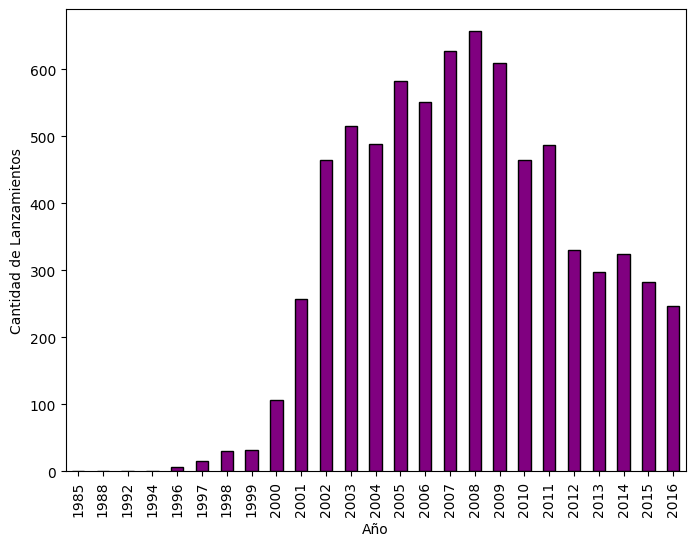

count    7380.000000
mean     2007.640786
std         4.270225
min      1985.000000
25%      2004.000000
50%      2008.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [23]:
lanzamientos_por_año = games_df.groupby("year_of_release")["name"].count()
print(lanzamientos_por_año)

lanzamientos_por_año.plot(kind="bar",
                         xlabel="Año",
                         ylabel="Cantidad de Lanzamientos",
                         color="purple",
                         figsize=[8,6],
                         edgecolor="black")

plt.show()

games_df["year_of_release"].describe()

Entre el año 2004 y 2011 se concentra la mayor cantidad de juegos lanzados por año, siendo el año 2008 el año que mas juegos se lanzaron con 657 titulos. 

Tambien podemos observar un gran salto en los lanzamientos conforme avanzan los años y la tecnologia va creciendo de manera importante a partir del 2000.

# Ventas por plataforma

In [24]:
print("Las plataformas registradas son: \n\n",games_df["platform"].unique(),"\n")

ventas_por_plataforma = games_df.groupby("platform")["total_sales"].sum().sort_values(ascending = True)

ventas_wii = games_df[games_df["platform"] == "Wii"]["total_sales"] 
ventas_ds =games_df[games_df["platform"] == "DS"]["total_sales"]
ventas_x360 = games_df[games_df["platform"] == "X360"]["total_sales"]
ventas_ps2 = games_df[games_df["platform"] == "PS2"]["total_sales"]
ventas_ps3 = games_df[games_df["platform"] == "PS3"]["total_sales"]

print("Estadisticos de las ventas DS: \n",ventas_ds.describe())
print()
print("Estadisticos de las ventas Wii: \n",ventas_wii.describe())

Las plataformas registradas son: 

 ['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC'] 

Estadisticos de las ventas DS: 
 count    511.000000
mean       0.807515
std        2.261380
min        0.010000
25%        0.105000
50%        0.240000
75%        0.650000
max       29.800000
Name: total_sales, dtype: float64

Estadisticos de las ventas Wii: 
 count    547.000000
mean       1.271956
std        4.753719
min        0.010000
25%        0.160000
50%        0.390000
75%        0.910000
max       82.540000
Name: total_sales, dtype: float64


In [25]:
print("Estadisticos de las ventas PS3: \n",ventas_ps3.describe())
print()
print("Estadisticos de las ventas X360: \n",ventas_x360.describe())
print()
print("Estadisticos de las ventas PS2: \n",ventas_ps2.describe())

Estadisticos de las ventas PS3: 
 count    851.000000
mean       0.971986
std        1.638895
min        0.010000
25%        0.210000
50%        0.510000
75%        1.045000
max       21.050000
Name: total_sales, dtype: float64

Estadisticos de las ventas X360: 
 count    939.000000
mean       0.945399
std        1.801481
min        0.010000
25%        0.170000
50%        0.380000
75%        0.940000
max       21.820000
Name: total_sales, dtype: float64

Estadisticos de las ventas PS2: 
 count    1220.000000
mean        0.805746
std         1.398955
min         0.010000
25%         0.160000
50%         0.390000
75%         0.862500
max        20.810000
Name: total_sales, dtype: float64


PlayStation 3 (PS3)
Media: 0.97 millones, es la plataforma con el promedio de ventas más alto.

Mediana: 0.51 millones, es más alta que las otras dos, indicando que más juegos están en rangos superiores.

Distribución sesgada a la derecha: la media es mucho mayor que la mediana, lo que indica que hay algunos juegos con ventas muy altas que elevan el promedio.

Máximo: 21.05 millones, un gran éxito en esta plataforma.

Xbox 360 (X360)
Media: 0.95 millones, muy cercana a PS3, aunque con una mediana menor (0.38 millones).

Desviación estándar: la más alta (1.80), lo que indica mayor dispersión en las ventas.

Distribución más desigual: muchos juegos con bajas ventas y unos pocos con ventas muy altas.

Máximo: el más alto (21.82 millones).

PlayStation 2 (PS2)
Media y mediana más bajas que las otras dos plataformas a pesar de que es la que ha genero mas ventas.

Más juegos en total (1220), lo cual puede influir en que haya más juegos con ventas bajas o moderadas.

Desviación estándar más baja, lo que sugiere una distribución más uniforme y menos dispersa.

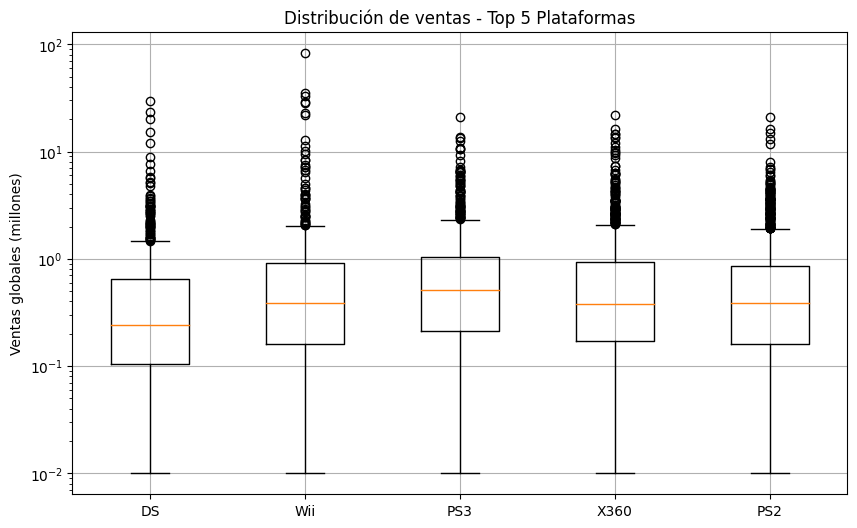

In [26]:
plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.boxplot([ventas_ds, ventas_wii, ventas_ps3, ventas_x360, ventas_ps2])

# Ajustes visuales
plt.title('Distribución de ventas - Top 5 Plataformas')
plt.ylabel('Ventas globales (millones)')
plt.xticks([1, 2, 3, 4, 5], ["DS","Wii","PS3","X360","PS2"])
#plt.xlabel()
plt.grid(True)
plt.show()

La mayoría de los juegos venden poco, independientemente de la plataforma.

Unos pocos "hits" se venden mucho mas sobre el promedio y elevan las estadísticas, lo cual justifica usar escala logarítmica para entender la distribución. ("plt.yscale('log') -> ajuste logaritmico que ajusta las dimensiones de la grafica para tener una mejor visualizacion")

Aunque las plataformas tienen diferentes máximos, su estructura de ventas es muy similar: muchos juegos con bajas ventas, pocos con ventas muy altas.

In [27]:
plataforma_vida = games_df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
plataforma_vida.columns = ['Plataforma', 'Año de lanzamiento', 'Último año con ventas']
plataforma_vida = plataforma_vida.sort_values(by = "Año de lanzamiento", ascending = True)
print(plataforma_vida)

   Plataforma  Año de lanzamiento  Último año con ventas
5          PC                1985                   2016
6          PS                1994                   2002
1          DC                1999                   2001
7         PS2                2000                   2011
15         XB                2000                   2008
3         GBA                2001                   2006
4          GC                2001                   2007
2          DS                2004                   2013
10        PSP                2004                   2013
14       X360                2005                   2016
8         PS3                2006                   2016
12        Wii                2006                   2014
0         3DS                2011                   2016
11        PSV                2011                   2016
13       WiiU                2012                   2016
9         PS4                2013                   2016
16       XOne                20

Tomando en cuenta el tiempo que transcurre entre el ultimo año con ventas y el año de lanzamiento, el promedio de vida de las plataformas es de 6.75 años. Teniendo en cuenta que la vida de las plataformas puede alcanzar el rango de 6 a 10 años de vida.

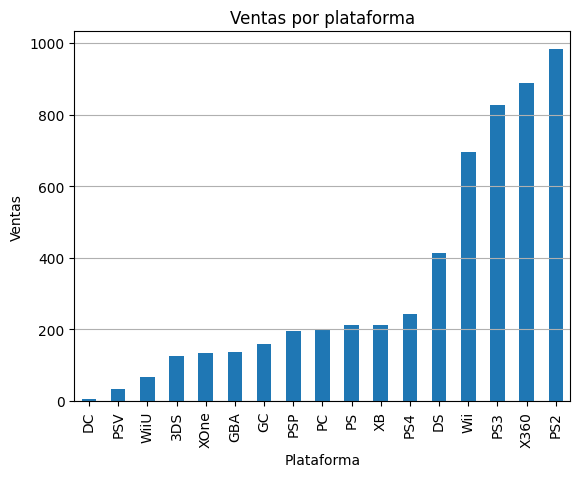

In [28]:
ventas_por_plataforma.plot(kind="bar",
                          xlabel="Plataforma",
                          ylabel="Ventas",
                          title = "Ventas por plataforma",
                          )
plt.grid(True, axis="y")
plt.show()

# Datos para proyeccion 2017

Las ventas globales alcanzan su punto máximo alrededor de 2008, y después empiezan a caer.

Las plataformas más relevantes en años recientes (2010–2016) son PS4, XOne, 3DS, etc., mientras que plataformas anteriores ya no aparecen.

Hay un cambio generacional de consolas alrededor de 2013–2015, cuando nacen PS4 y XOne.

2013–2016	Es el ciclo reciente con las plataformas actuales vivas en 2017 (PS4, XOne, 3DS, etc.) y representa la generación más cercana.

Evitar años anteriores a 2010	Porque están dominados por consolas descontinuadas (PS2, Wii, DS). Sus patrones de venta ya no reflejan el mercado actual.

En conclusion se considera que lo mas optimo es tomar los datos que se encuentren entre el 2013 y el 2016 para construir el modelo de 2017 ya que en este intervalo contamos con informacion relevante, aun presenten y activo en el mercado.

# Partiendo del 2013

In [29]:
platform_total_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_total_sales.head(10))

platform
PS2     983.01
X360    887.73
PS3     827.16
Wii     695.76
DS      412.64
PS4     243.63
XB      212.66
PS      210.96
PC      196.94
PSP     195.61
Name: total_sales, dtype: float64


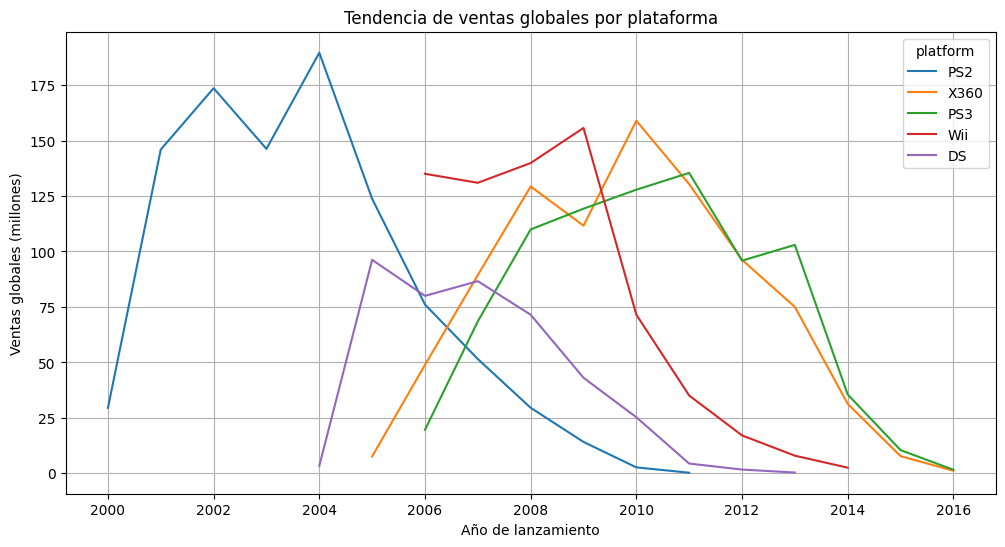

In [30]:
platform_sales = games_df.groupby(["year_of_release","platform"])["total_sales"].sum().unstack()

top_5 = platform_total_sales.head(5).index

platform_sales[top_5].plot(kind='line',
                             figsize=(12, 6),
                             title='Tendencia de ventas globales por plataforma',
                             xlabel='Año de lanzamiento',
                             ylabel='Ventas globales (millones)')
plt.grid(True)
plt.show()

# Observaciones

Las plataformas con ventas acumuladas más altas a lo largo del tiempo son:

PS2: claramente la plataforma con el mayor pico histórico, superando los 180 millones en años como 2004.

X360 y PS3: tuvieron un desempeño sólido entre 2007 y 2012, siendo parte de la misma generación.

Wii: logró un pico en 2009, superando momentáneamente a PS3 y DS.

Ninguna de las plataformas del gráfico está creciendo actualmente, pero podemos señalar que:

X360, PS3, y Wii crecieron fuertemente desde su aparición hasta sus picos entre 2008 y 2010.

El ascenso de X360 es particularmente claro y constante desde 2005 hasta su pico en 2010.

Todas las plataformas mostradas están en declive claro a partir de 2010–2012:

PS2: cae rápidamente después de 2005.

DS: pierde fuerza después de su pico en 2006.

Wii: su declive comienza tras su máximo en 2009.

X360 y PS3: declinan a partir de 2011.

Esto indica el fin de su ciclo de vida, probablemente por la llegada de nuevas generaciones (PS4, XOne, etc.).

# Conclusiones

PS2 es el líder histórico en ventas, con una ventaja clara durante la primera década de los 2000.

X360 y PS3 dominaron la segunda mitad de la década, mostrando picos importantes de ventas.

Wii y DS tuvieron un gran auge por el enfoque casual y portátil, pero también declinaron tras sus picos.

Ninguna de estas plataformas sigue siendo rentable en la actualidad, ya que todas muestran una tendencia de caída o desaparición total hacia 2015–2016.

# Plataformas Lideres

In [31]:
df_2013 = games_df[games_df["year_of_release"] >= 2013]

<Figure size 1400x600 with 0 Axes>

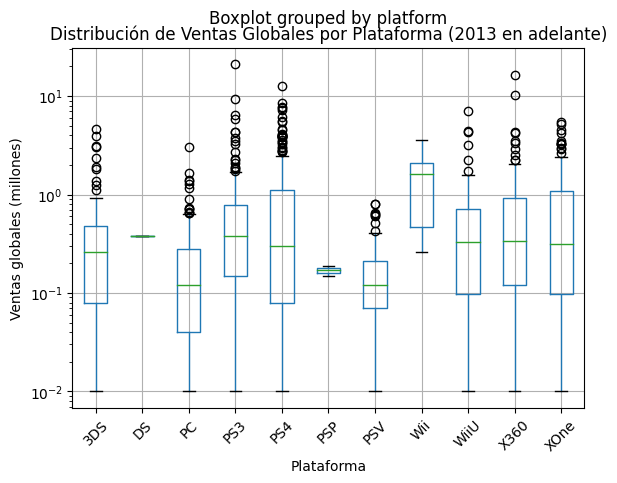

In [32]:
plt.figure(figsize=(14, 6))
df_2013.boxplot(column='total_sales', by='platform')
plt.title('Distribución de Ventas Globales por Plataforma (2013 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(True)
plt.show()

In [33]:
ventas_DS = df_2013[df_2013["platform"] == "DS"]["total_sales"]
print(ventas_DS)
ventas_DS.describe()

5054    0.38
Name: total_sales, dtype: float64


count    1.00
mean     0.38
std       NaN
min      0.38
25%      0.38
50%      0.38
75%      0.38
max      0.38
Name: total_sales, dtype: float64

PS4 y Wii tienen las medianas más altas → típicamente, sus juegos venden más que en otras plataformas.

XOne y 3DS también tienen buenas medianas.

PS3, PS4, X360, y XOne tienen una distribución muy amplia, lo que indica:

Alta variabilidad en ventas.

Juegos con tanto éxito masivo como fracasos comerciales.

Muchos valores atipicos superiores (arriba de 10 millones) sugieren que algunas franquicias tienen ventas excepcionales.

PSP y DS muestran:

Cajas más bajas en el gráfico (ventas por debajo de 0.5 millones).

Muchas observaciones cercanas al mínimo.

Esto sugiere bajo rendimiento promedio en esa etapa (2013+).



In [34]:
top_plataformas = df_2013.groupby("platform")["total_sales"].sum().sort_values(ascending=True)
print(top_plataformas)

platform
PSP       0.34
DS        0.38
Wii      10.54
PSV      17.28
PC       34.16
3DS      43.25
WiiU     52.36
X360    115.30
XOne    133.53
PS3     150.64
PS4     243.63
Name: total_sales, dtype: float64


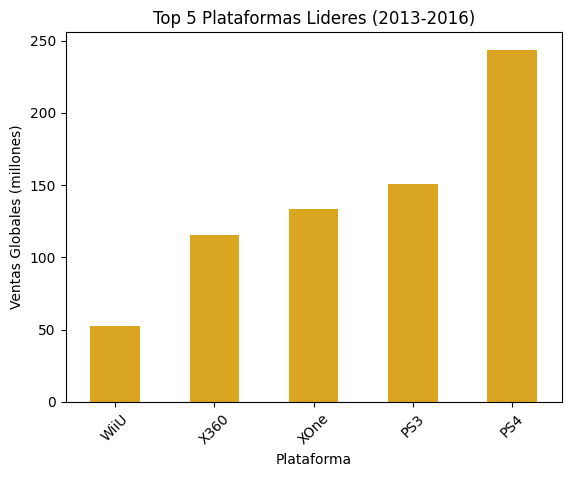

In [35]:
top_plataformas.tail(5).plot(kind="bar",
                   xlabel = "Plataforma",
                   ylabel = "Ventas Globales (millones)",
                   title = "Top 5 Plataformas Lideres (2013-2016)",
                     color = "goldenrod"
                   )
plt.xticks(rotation=45)
plt.show()

De las 11 plataformas que representan las ventas desde el 2013 en adelante, las plataformas que lideran el mercado son:

- WiiU ------- 52.36 
- X360 ------- 115.30
- XOne ------- 133.53
- PS3 -------- 150.64
- PS4 -------- 243.63

# Ventas Xbox 360

In [36]:
df_x360 = games_df[
    (games_df["platform"] == "X360") & 
    (games_df["critic_score"]) & 
    (games_df["user_score"]) & 
    (games_df["total_sales"])]
display(df_x360)

df_x360.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.00,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.00,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.00,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16311,Banjo-Kazooie,X360,2008,Platform,0.00,0.01,0.00,0.00,77.00,8.2,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,68.99,4.5,E,0.01
16460,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,68.99,6.2,T,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.00,2.1,T,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 14 to 16654
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             939 non-null    object 
 1   platform         939 non-null    object 
 2   year_of_release  939 non-null    int64  
 3   genre            939 non-null    object 
 4   na_sales         939 non-null    float64
 5   eu_sales         939 non-null    float64
 6   jp_sales         939 non-null    float64
 7   other_sales      939 non-null    float64
 8   critic_score     939 non-null    float64
 9   user_score       939 non-null    float64
 10  rating           939 non-null    object 
 11  total_sales      939 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 95.4+ KB


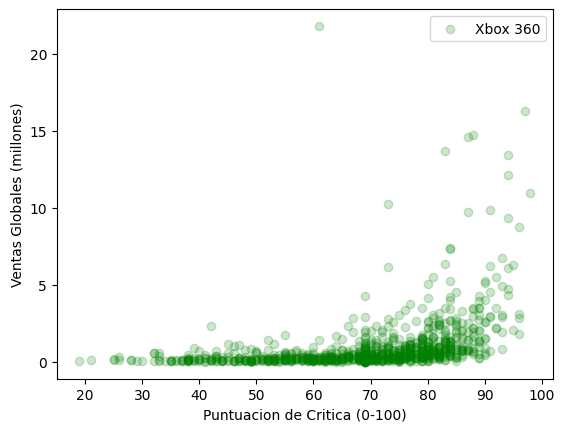

In [37]:
#Grafica de dispersion para observar como dependen las ventas segun la calificacion que proporciono la critica.
plt.scatter(df_x360["critic_score"],
            df_x360["total_sales"],
            color="green",
            alpha=.2)
plt.xlabel("Puntuacion de Critica (0-100)")
plt.ylabel("Ventas Globales (millones)")
plt.legend(["Xbox 360"])

plt.show()

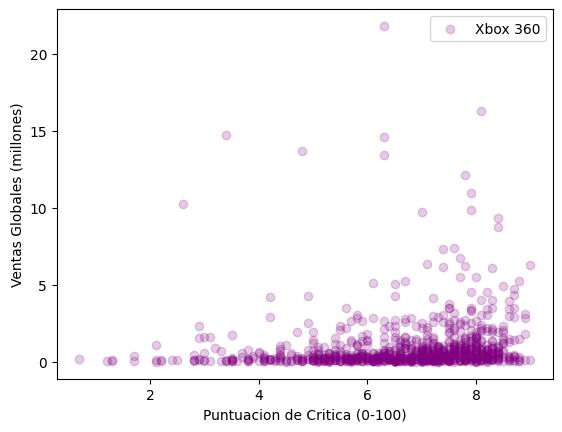

In [38]:
#Grafica de dispersion para observar como dependen las ventas segun la calificacion que proporcionaron los usuarios.
plt.scatter(df_x360["user_score"],
            df_x360["total_sales"],
            color="purple",
            alpha=.2)
plt.xlabel("Puntuacion de Critica (0-100)")
plt.ylabel("Ventas Globales (millones)")
plt.legend(["Xbox 360"])

plt.show()

In [39]:
corr_critic_sales_x360= df_x360["critic_score"].corr(df_x360["total_sales"])
print("La correlacion que presenta las calificacion de la critica con las ventas globales para la plataforma de Xbox 360 es de: \n",corr_critic_sales_x360.round(2))
print()
corr_users_sales_x360= df_x360["user_score"].corr(df_x360["total_sales"])
print("La correlacion que presenta las calificacion de los usuarios con las ventas globales para la plataforma de Xbox 360 es de: \n",corr_users_sales_x360.round(2))

La correlacion que presenta las calificacion de la critica con las ventas globales para la plataforma de Xbox 360 es de: 
 0.39

La correlacion que presenta las calificacion de los usuarios con las ventas globales para la plataforma de Xbox 360 es de: 
 0.12


Podemos observar que la califiacion de los usuarios como de la critica no impacta fuertemente en las ventas globales. Por otro lado, tambien podemos ver que, aunque el grafico toma una curva hacia arriba, la mayor parte de valores se encuentran abajo, son los valores atipicos los que se podrian hacer que relacionemos las variables de manera positiva.

In [40]:
top_game_sales = games_df.groupby("name")["total_sales"].sum().sort_values(ascending=True)
print(top_game_sales.tail(10))

name
New Super Mario Bros. Wii         28.32
Wii Play                          28.91
Call of Duty: Black Ops           29.20
Call of Duty: Black Ops II        29.40
New Super Mario Bros.             29.80
Call of Duty: Modern Warfare 3    30.60
Wii Sports Resort                 32.77
Mario Kart Wii                    35.52
Grand Theft Auto V                56.58
Wii Sports                        82.54
Name: total_sales, dtype: float64


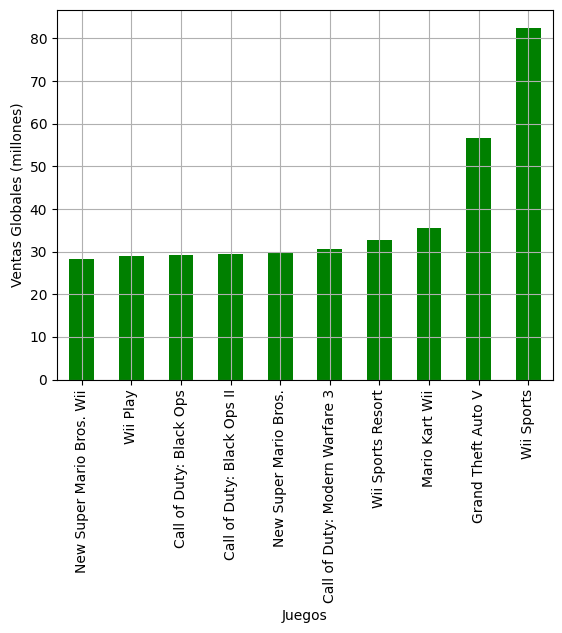

In [41]:
top_game_sales.tail(10).plot(kind="bar",
                   color="green",
                   grid=True,
                   xlabel="Juegos",
                   ylabel="Ventas Globales (millones)")
plt.show()

# Juegos Multiplataforma

In [42]:
# Contar en cuántas plataformas aparece cada juego
juegos_multiplataforma = games_df.groupby('name')['platform'].nunique()
print(juegos_multiplataforma)
print("_____________________________________")
# Filtrar los que aparecen en 2 o más plataformas
juegos_en_plataformas = juegos_multiplataforma[juegos_multiplataforma > 4].index
print(juegos_en_plataformas)

name
 Tales of Xillia 2              1
.hack//Infection Part 1         1
.hack//Mutation Part 2          1
.hack//Outbreak Part 3          1
007 Racing                      1
                               ..
inFAMOUS 2                      1
inFAMOUS: Second Son            1
nail'd                          2
pro evolution soccer 2011       5
uDraw Studio: Instant Artist    1
Name: platform, Length: 4594, dtype: int64
_____________________________________
Index(['Alien: Isolation', 'Angry Birds Star Wars',
       'Assassin's Creed IV: Black Flag', 'Bakugan: Battle Brawlers',
       'Band Hero', 'Battlefield 4', 'Battlefield: Hardline',
       'Blazing Angels: Squadrons of WWII', 'Call of Duty: Advanced Warfare',
       'Call of Duty: Ghosts',
       ...
       'Ultimate Spider-Man', 'WWE All Stars', 'WWE SmackDown vs Raw 2008',
       'WWE SmackDown vs. Raw 2009', 'WWE SmackDown vs. Raw 2010', 'Wall-E',
       'Watch Dogs', 'Wolfenstein: The New Order', 'X-Men: The Official Game',
    

In [43]:
df_multiplataforma = games_df[games_df['name'].isin(juegos_en_plataformas)]
print(df_multiplataforma)

                                          name platform  year_of_release  \
16                          Grand Theft Auto V      PS3             2013   
23                          Grand Theft Auto V     X360             2013   
42                          Grand Theft Auto V      PS4             2014   
60                        Call of Duty: Ghosts     X360             2013   
69                        Call of Duty: Ghosts      PS3             2013   
...                                        ...      ...              ...   
16327  Harry Potter and the Chamber of Secrets       PC             2002   
16335                Marvel: Ultimate Alliance       PC             2006   
16484              Juiced 2: Hot Import Nights       PC             2007   
16528                Pro Evolution Soccer 2010       PC             2009   
16692        Metal Gear Solid V: Ground Zeroes       PC             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16     

In [44]:
ventas_por_juego_plataforma = df_multiplataforma.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Opcional: ver los 5 primeros juegos multiplataforma
ventas_por_juego_plataforma.head()
display(ventas_por_juego_plataforma)

platform,3DS,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,
Alien: Isolation,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.33,1.12,0.0,0.00,0.00,0.00,0.27,0.0,0.50
Angry Birds Star Wars,0.33,0.00,0.00,0.00,0.00,0.0,0.00,0.29,0.22,0.0,0.08,0.26,0.10,0.28,0.0,0.17
Assassin's Creed IV: Black Flag,0.00,0.00,0.00,0.00,0.65,0.0,0.00,3.71,2.86,0.0,0.00,0.00,0.29,3.31,0.0,2.24
Bakugan: Battle Brawlers,0.00,1.38,0.00,0.00,0.00,0.0,0.42,0.24,0.00,0.0,0.00,0.67,0.00,0.24,0.0,0.00
Band Hero,0.00,0.43,0.00,0.00,0.00,0.0,0.41,0.75,0.00,0.0,0.00,0.97,0.00,0.79,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wall-E,0.00,0.00,0.00,0.00,0.01,0.0,0.75,0.41,0.00,0.0,0.00,1.02,0.00,0.62,0.0,0.00
Watch Dogs,0.00,0.00,0.00,0.00,0.44,0.0,0.00,1.74,4.05,0.0,0.00,0.00,0.13,1.25,0.0,1.57
Wolfenstein: The New Order,0.00,0.00,0.00,0.00,0.45,0.0,0.00,0.44,1.54,0.0,0.00,0.00,0.00,0.38,0.0,0.68


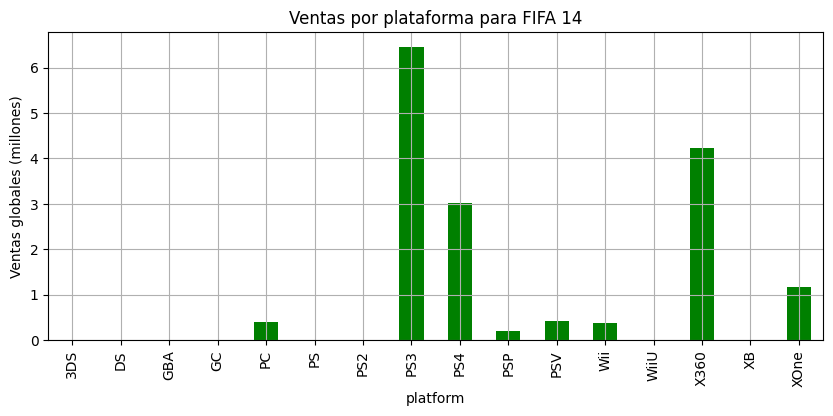

In [45]:
ventas_por_juego_plataforma.loc['FIFA 14'].plot(kind='bar',
                                                figsize=(10, 4),
                                                title='Ventas por plataforma para FIFA 14',
                                                ylabel='Ventas globales (millones)',
                                                color="green")
plt.grid(True)
plt.show()

A pesar de los años de lanzamiento de las consolas xbox 360 (2005) y xbox one (2013) y que el xbox one se lanzo mas cercana a la fecha del juego FIFA 2014, este se vendio considerablementes mas para la consola del 2005. Esto se puede deber a que, xbox one, al ser una consola practicamente nuevo, fuese mas cara y que el xbox 360 tuviese mas presencia e historia en el mercado. Y lo mismo podriamos intrepretar del caso de las consolas PS3 (2006) y PS4 (2013).

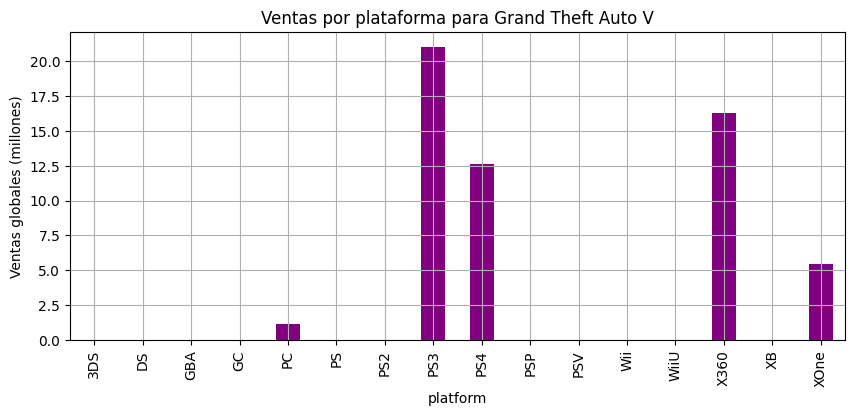

In [46]:
ventas_por_juego_plataforma.loc['Grand Theft Auto V'].plot(kind='bar',
                                                           figsize=(10, 4),
                                                           title='Ventas por plataforma para Grand Theft Auto V',
                                                           ylabel='Ventas globales (millones)',
                                                           color="purple")
plt.grid(True)
plt.show()

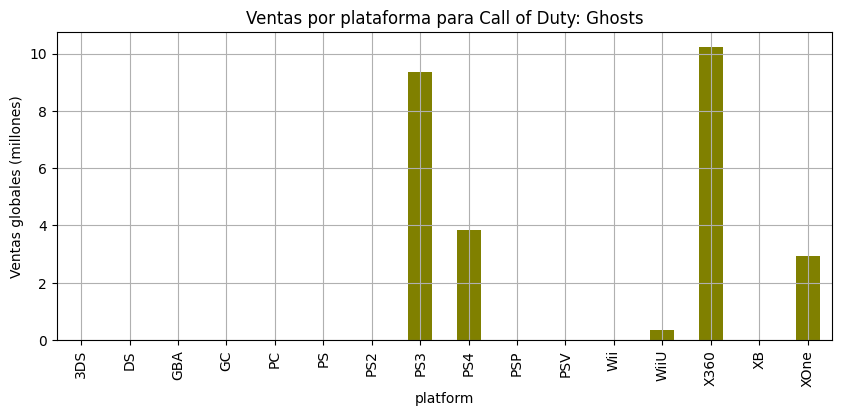

In [47]:
ventas_por_juego_plataforma.loc['Call of Duty: Ghosts'].plot(kind='bar',
                                                             figsize=(10, 4),
                                                             title='Ventas por plataforma para Call of Duty: Ghosts',
                                                             ylabel='Ventas globales (millones)',
                                                             color="olive")
plt.grid(True)
plt.show()

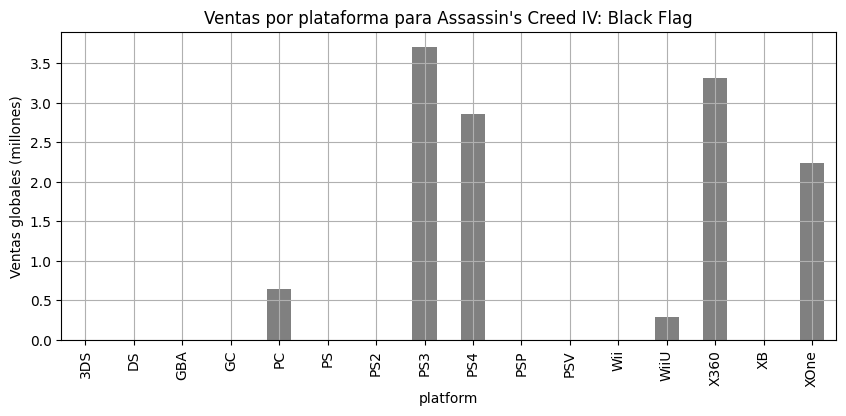

In [48]:
ventas_por_juego_plataforma.loc["Assassin's Creed IV: Black Flag"].plot(kind='bar',
                                                                        figsize=(10, 4),
                                                                        title="Ventas por plataforma para Assassin's Creed IV: Black Flag",
                                                                        ylabel='Ventas globales (millones)',
                                                                        color="gray")
plt.grid(True)
plt.show()

# Conclusion

Podemos observar en todas las graficas que las plataformas con mas presencia en el mercado, que cuentan con los titulos para diferentes plataformas, son PS3 y Xbox 360 como las fuertes, seguidas del PS4 y el Xbox One. 

Dadas las fechas de lanzamiento de las plataformas, juegos y el alcance de la base de datos, que se limita al 2016, las plataformas mas nuevas, aunque son una nueva generacion, no cuentan con tantas ventas y eso se puede ver limitado debido a que son consolas que se lanzaron en el 2013 y solo tienen datos hasta el 2016.

# Ventas por Genero

              na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action          620.37    404.69     78.18       154.58
Sports          489.35    267.67     36.65       104.19
Shooter         458.90    268.39     19.08        90.42
Misc            233.29    124.49     33.24        42.71
Racing          230.70    166.85     27.79        59.92
Role-Playing    221.09    120.00    123.94        40.85
Platform        198.47    111.64     43.10        33.68
Fighting        138.26     61.45     28.21        26.23
Simulation      100.25     73.47     26.16        18.81
Adventure        47.23     29.68      8.78         9.41
Strategy         39.07     27.53      4.34         7.08
Puzzle           34.10     24.38     14.98         6.45


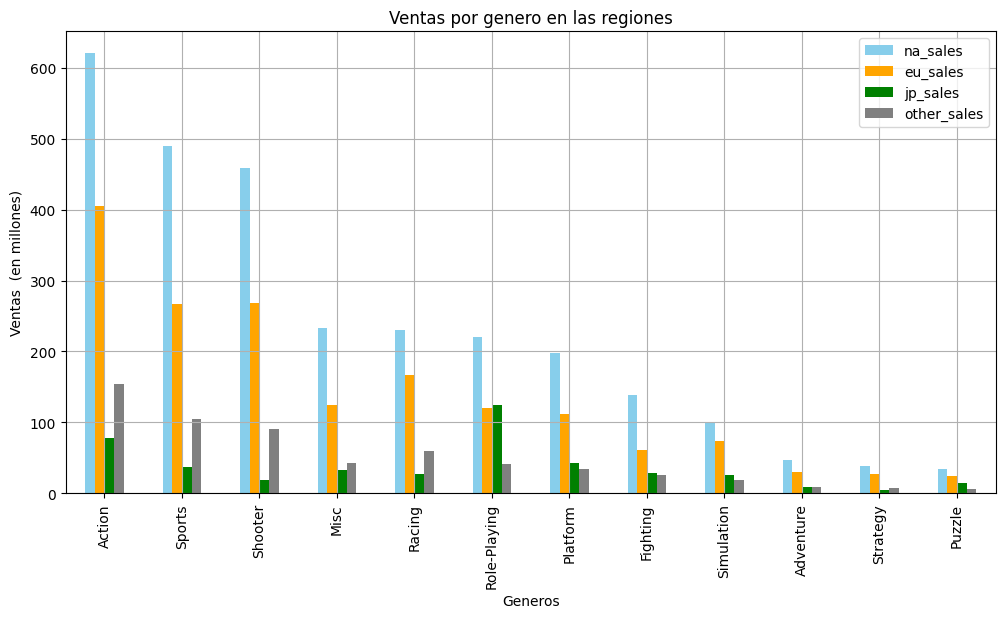

In [49]:
generos_regiones = games_df.groupby("genre")[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum()

#Seleccionamos las 
ventas_top_generos = generos_regiones.sort_values(by="na_sales", ascending=False)
print(ventas_top_generos)

ventas_top_generos.plot(kind="bar",
               figsize = [12,6],
               color = ["skyblue","orange","green","gray"],
               xlabel = "Generos",
                ylabel =  "Ventas  (en millones)",
                title = "Ventas por genero en las regiones"
               )
plt.grid(True)
plt.show()

In [50]:
ventas_por_genero = games_df.groupby("genre")["total_sales"].sum().sort_values(ascending = True)
print("Nuestra base de datos cuenta con 12 tipos de genero diferentes: \n\n",games_df["genre"].unique())
display(ventas_por_genero.sort_values(ascending = False))

Nuestra base de datos cuenta con 12 tipos de genero diferentes: 

 ['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


genre
Action          1257.82
Sports           897.86
Shooter          836.79
Role-Playing     505.88
Racing           485.26
Misc             433.73
Platform         386.89
Fighting         254.15
Simulation       218.69
Adventure         95.10
Puzzle            79.91
Strategy          78.02
Name: total_sales, dtype: float64

En la representacion grafica de las ventas por region, podemos observar que en la region de Norte America cuenta con la mayor representacion en ventas en todos los generos, seguido de Europa y en otras regiones muestra mas ventas en general sobre Japon, excepto en el genero de Role-Playing.

# Conclusiones
Podemos observar que el top 5 de generos de las ventas totales son: Racing (quinto lugar), Role-Playing, Shooter, Sports y Action (primer lugar), lo que nos da a entender que son los mas rentables.

Por regiones, tenemos pequeñas variaciones. El top 3 por region, excepto en Japon, se mantiene constante en Action, Sport y Shooter, con ligera vaciacion en los puestos, pero se encuentran en los 3 generos mas vendidos. Por otro lado en Japon, tenemos en los 3 mas vendidos se encuentran: Plataforma, Action y Role-Playing.

El en los puestos 4 y 5 de los mas vendidos en todas las regiones, tenemos presentes los generos Misc y Racing.

En las ventas globales, tenemos las siguientes ventas en millones de dolares:

Genero___________Ventas

Action___________1257.82

Sports___________897.86

Shooter__________836.79

Role-Playing_____505.88

Racing___________485.26

# 4. Perfil de Usuario por Region

# Ventas por Plataforma y por Region

'Top 5 Ventas por plataforma en Norte America:'

platform
X360    554.65
PS2     487.52
Wii     368.58
PS3     357.87
DS      192.00
Name: na_sales, dtype: float64

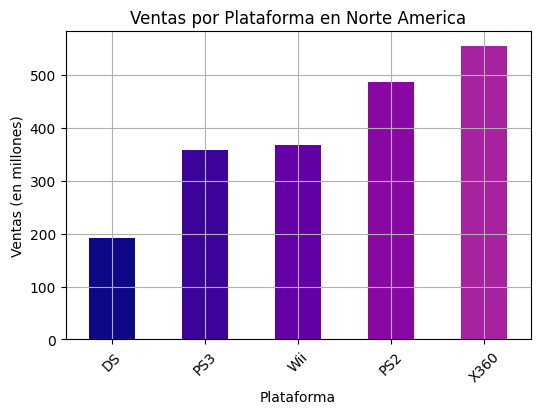

'Top 5 Ventas por plataforma en Europa:'

platform
PS3     289.99
PS2     264.97
X360    244.46
Wii     212.19
PS4     112.12
Name: eu_sales, dtype: float64

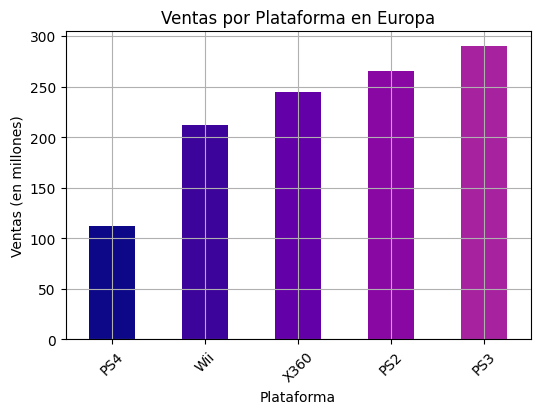

'Top 5 Ventas por plataforma en Japon:'

platform
DS     83.67
PS2    77.03
PS3    58.26
Wii    52.49
PS     39.00
Name: jp_sales, dtype: float64

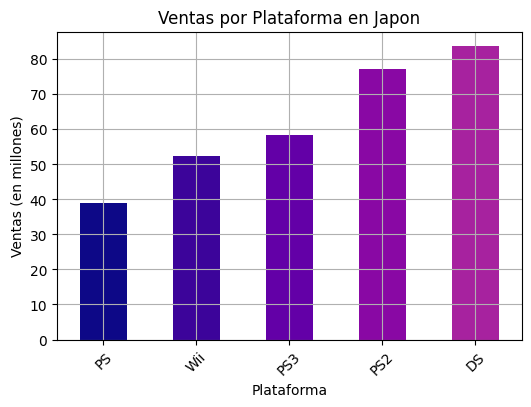

In [89]:
# Top 5 Plataformas NA

na_sales_platform = games_df.groupby("platform")["na_sales"].sum().sort_values(ascending = True).tail()
na_sales_platform.plot(kind="bar",
                       title="Ventas por Plataforma en Norte America",
                       xlabel="Plataforma",
                       ylabel="Ventas (en millones)",
                       figsize=[6,4],
                       color = ["#0D0887", "#3C049A", "#6300A7", "#8908A4","#A7229F", "#C63C94", "#DD5C82", "#ED7953","#F8951F", "#FBB61A", "#F7D13D", "#F0F921"]
                      )

display("Top 5 Ventas por plataforma en Norte America:",na_sales_platform.sort_values(ascending = False))
plt.grid(True)
plt.xticks(rotation= 45)
plt.show()

# Top 5 Plataformas EU

eu_sales_platform = games_df.groupby("platform")["eu_sales"].sum().sort_values(ascending = True).tail()
eu_sales_platform.plot(kind="bar",
                       title="Ventas por Plataforma en Europa",
                       xlabel="Plataforma",
                       ylabel="Ventas (en millones)",
                       figsize=[6,4],
                       color = ["#0D0887", "#3C049A", "#6300A7", "#8908A4","#A7229F", "#C63C94", "#DD5C82", "#ED7953","#F8951F", "#FBB61A", "#F7D13D", "#F0F921"]
                      )

display("Top 5 Ventas por plataforma en Europa:",eu_sales_platform.sort_values(ascending = False))
plt.grid(True)
plt.xticks(rotation= 45)
plt.show()

# Top 5 Plataformas JP

jp_sales_platform = games_df.groupby("platform")["jp_sales"].sum().sort_values(ascending = True).tail()
jp_sales_platform.plot(kind="bar",
                       title="Ventas por Plataforma en Japon",
                       xlabel="Plataforma",
                       ylabel="Ventas (en millones)",
                       figsize=[6,4],
                       color = ["#0D0887", "#3C049A", "#6300A7", "#8908A4","#A7229F", "#C63C94", "#DD5C82", "#ED7953","#F8951F", "#FBB61A", "#F7D13D", "#F0F921"]
                      )

display("Top 5 Ventas por plataforma en Japon:",jp_sales_platform.sort_values(ascending = False))
plt.grid(True)
plt.xticks(rotation= 45)
plt.show()


# Conclusiones

- Norteamérica (NA)
Plataforma líder: X360 (Xbox 360) con 554.65 millones de unidades.

Le siguen: PS2, Wii, PS3, DS.

En NA, las consolas de Microsoft y Nintendo tienen fuerte presencia.

X360 supera notablemente a PS3, lo que refleja una clara preferencia por Xbox frente a PlayStation en esta región.

- Europa (EU)
Plataforma líder: PS3 con 289.99 millones.

Le siguen: PS2, X360, Wii, PS4.

Europa muestra una preferencia marcada por consolas de Sony.

PS3 y PS2 dominan, mientras que X360 queda en tercer lugar, lo inverso a NA.

PS4 aparece ya entre los más vendidos, mostrando su entrada fuerte al mercado.

- Japón (JP)
Plataforma líder: DS con 83.67 millones.

Le siguen: PS2, PS3, Wii, PS.

Japón es claramente un mercado portátil y localista:

DS domina ampliamente su mercado.

Consolas de Sony (PS2, PS3, PS) tienen fuerte presencia.

Xbox no aparece entre las 5 más vendidas, lo que reafirma su bajo impacto en Japón.



# Ventas por Genero y por Region

'Top 5 Ventas por genero en Norte America:'

genre
Action     620.37
Sports     489.35
Shooter    458.90
Misc       233.29
Racing     230.70
Name: na_sales, dtype: float64

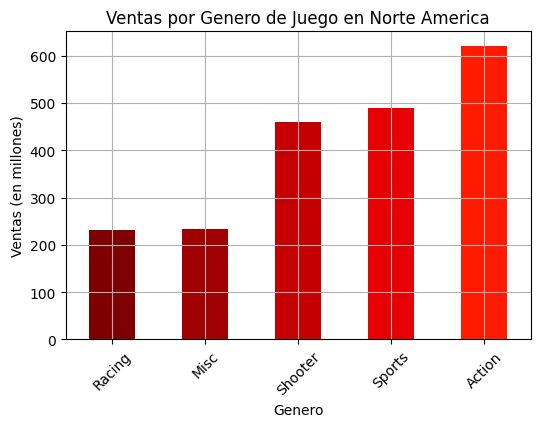

'Top 5 Ventas por genero en Europa:'

genre
Action     404.69
Shooter    268.39
Sports     267.67
Racing     166.85
Misc       124.49
Name: eu_sales, dtype: float64

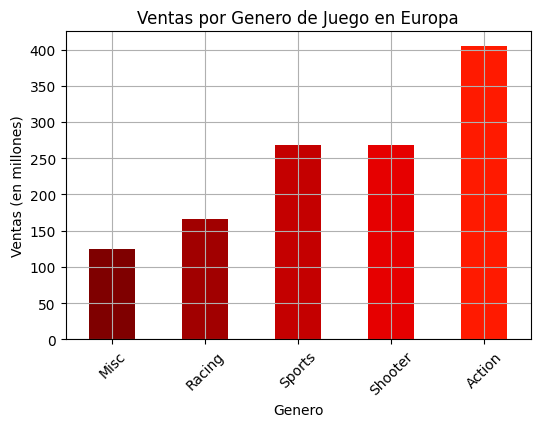

'Top 5 Ventas por genero en Japon:'

genre
Role-Playing    123.94
Action           78.18
Platform         43.10
Sports           36.65
Misc             33.24
Name: jp_sales, dtype: float64

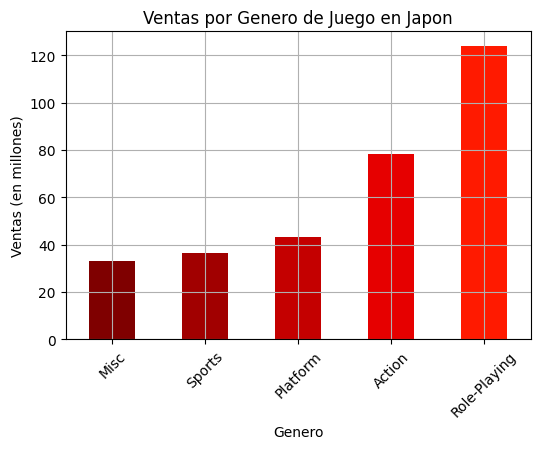

In [90]:
# Top 5 Generos NA

na_sales_genre = games_df.groupby("genre")["na_sales"].sum().sort_values(ascending = True).tail()
na_sales_genre.plot(kind="bar",
                       title="Ventas por Genero de Juego en Norte America",
                       xlabel="Genero",
                       ylabel="Ventas (en millones)",
                       figsize=[6,4],
                       color = ["#7F0000", "#A10000", "#C40000", "#E60000","#FF1A00", "#FF4000", "#FF6600", "#FF8000","#FF9900", "#FFB300", "#FFCC00", "#FFE066"]
                      )

display("Top 5 Ventas por genero en Norte America:",na_sales_genre.sort_values(ascending = False))
plt.grid(True)
plt.xticks(rotation= 45)
plt.show()

# Top 5 Generos EU

eu_sales_genre = games_df.groupby("genre")["eu_sales"].sum().sort_values(ascending = True).tail()
eu_sales_genre.plot(kind="bar",
                       title="Ventas por Genero de Juego en Europa",
                       xlabel="Genero",
                       ylabel="Ventas (en millones)",
                       figsize=[6,4],
                       color = ["#7F0000", "#A10000", "#C40000", "#E60000","#FF1A00", "#FF4000", "#FF6600", "#FF8000","#FF9900", "#FFB300", "#FFCC00", "#FFE066"]
                      )

display("Top 5 Ventas por genero en Europa:",eu_sales_genre.sort_values(ascending = False))
plt.grid(True)
plt.xticks(rotation= 45)
plt.show()

# Top 5 Generos JP

jp_sales_genre = games_df.groupby("genre")["jp_sales"].sum().sort_values(ascending = True).tail()
jp_sales_genre.plot(kind="bar",
                       title="Ventas por Genero de Juego en Japon",
                       xlabel="Genero",
                       ylabel="Ventas (en millones)",
                       figsize=[6,4],
                       color = ["#7F0000", "#A10000", "#C40000", "#E60000","#FF1A00", "#FF4000", "#FF6600", "#FF8000","#FF9900", "#FFB300", "#FFCC00", "#FFE066"]
                      )

display("Top 5 Ventas por genero en Japon:",jp_sales_genre.sort_values(ascending = False))
plt.grid(True)
plt.xticks(rotation= 45)
plt.show()

# Conclusiones

- Norteamérica (NA)
Género líder: Action, con más de 600 millones de ventas.

Le siguen: Sports, Shooter, Misc, y Racing.

Los juegos de acción y disparos (Shooter) dominan fuertemente en el gusto del público.

Juegos deportivos también tienen fuerte presencia, con juegos populares como lo son NBA y Maden

- Europa (EU)
Género líder: Action, con poco más de 400 millones.

Le siguen: Shooter, Sports, Racing, y Misc.

Muy similar a NA, pero con menor énfasis en Shooter.

Acción y deportes también son los favoritos, aunque el orden y el volumen son ligeramente distintos.

- Japón (JP)
Género líder: Role-Playing, con más de 120 millones.

Le siguen: Action, Platform, Sports, y Misc.

Completamente diferente de NA y EU:

Los RPGs dominan claramente (por ejemplo, Final Fantasy, Dragon Quest, Pokémon).

También hay interés en juegos de plataformas (como Mario).

Shooter ni siquiera aparece entre los géneros más vendidos, lo cual indica baja afinidad con ese género en Japón.

# Ventas vs Rating (por regiones)

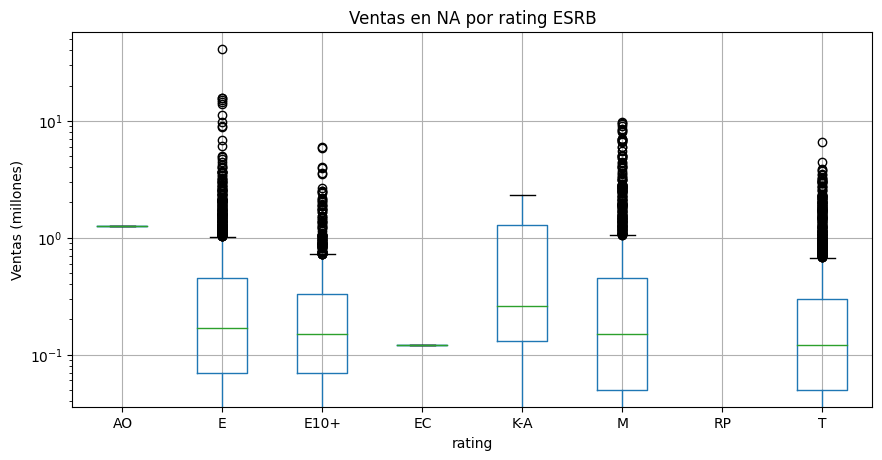

In [80]:
games_df.boxplot(column='na_sales', by='rating', figsize=(10,5))
plt.title("Ventas en NA por rating ESRB")
plt.suptitle("")
plt.ylabel("Ventas (millones)")
plt.yscale("log")
plt.grid(True)
plt.show()

In [81]:
# Rating vs Ventas NA (y General)

na_sales_rating = games_df.groupby("rating")["na_sales"].median().sort_values(ascending = False)
print(na_sales_rating)
print("__________________________")

print("Cantidad de juegos por rating ESRB (general):\n",games_df["rating"].value_counts())

rating
AO      1.26
K-A     0.26
E       0.17
E10+    0.15
M       0.15
EC      0.12
T       0.12
RP      0.00
Name: na_sales, dtype: float64
__________________________
Cantidad de juegos por rating ESRB (general):
 T       2518
E       2338
M       1492
E10+    1026
K-A        3
EC         1
RP         1
AO         1
Name: rating, dtype: int64


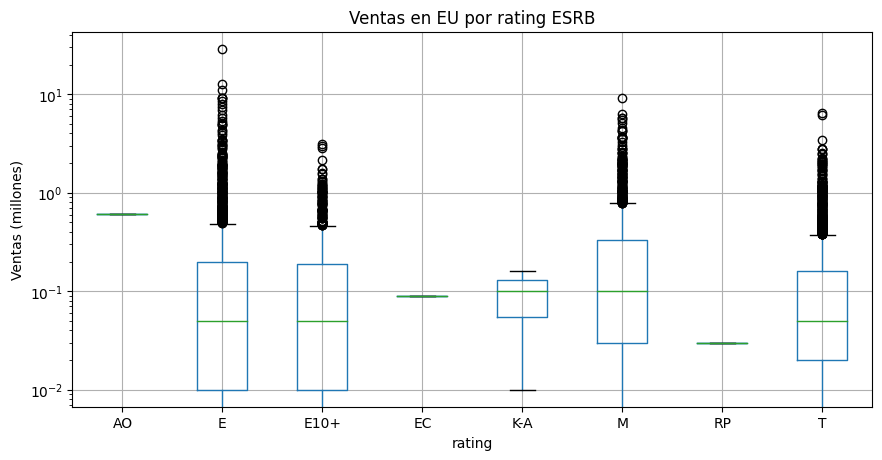

In [82]:
games_df.boxplot(column='eu_sales', by='rating', figsize=(10,5))
plt.title("Ventas en EU por rating ESRB")
plt.suptitle("")
plt.ylabel("Ventas (millones)")
plt.yscale("log")
plt.grid(True)
plt.show()

In [83]:
eu_sales_rating = games_df.groupby("rating")["eu_sales"].median().sort_values(ascending = False)
print(eu_sales_rating)

rating
AO      0.61
K-A     0.10
M       0.10
EC      0.09
E       0.05
E10+    0.05
T       0.05
RP      0.03
Name: eu_sales, dtype: float64


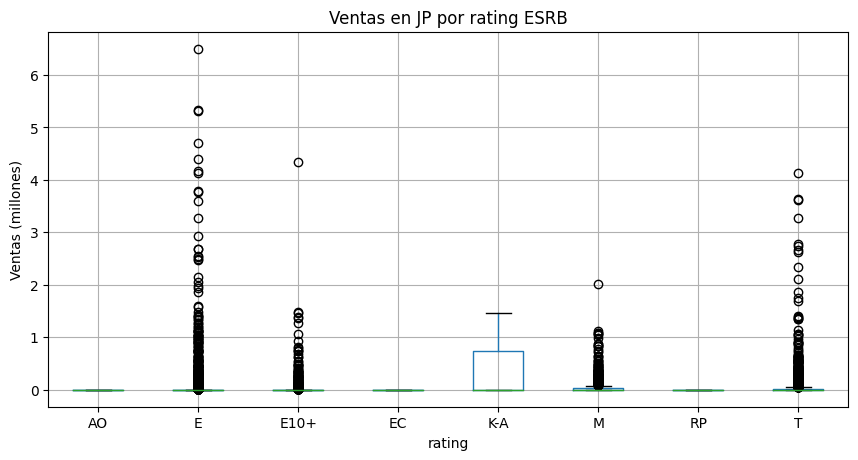

In [84]:
# Rating vs Ventas JP

games_df.boxplot(column='jp_sales', by='rating', figsize=(10,5))
plt.title("Ventas en JP por rating ESRB")
plt.suptitle("")
plt.ylabel("Ventas (millones)")
#plt.yscale("log")

plt.grid(True)
plt.show()

In [85]:
jp_sales_rating = games_df.groupby("rating")["jp_sales"].mean().sort_values(ascending = False)
print(jp_sales_rating.round(2))

rating
K-A     0.49
E       0.08
T       0.06
M       0.04
E10+    0.04
AO      0.00
EC      0.00
RP      0.00
Name: jp_sales, dtype: float64


# Conclusiones
- Ventas NA
Las clasificaciones "M" y "K-A" tienden a tener mejores ventas promedio, pero los juegos "E" y "E10+" tienen algunos de los mayores éxitos del mercado. La clasificación sí influye, aunque también depende del título.

- Ventas EU
"Mature" sigue siendo competitivo, aunque no tan claramente superior. En general, la clasificación tiene cierto impacto, pero las diferencias son menos notorias que en NA.

- Ventas JP
En Japón, la clasificación ESRB no parece tener un efecto fuerte en las ventas.  El ESRB no presenta ser  relevante para el consumidor japonés promedio.

# 5. Prueba de Hipotesis

In [97]:
# Establecemos el valor de umbral alfa: 5%
# Usamos este este umbral para tener un bajo riesgo de error.

alpha = .05

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [102]:
# H0: Las calificaciones promedio de los usuarios para las plataformas de Xbox One y PC son las mismas.
# H1: Las calificaciones promdio de los usuarios son diferentes para las plataformas de Xbox One y PC.

xbox_score = games_df[games_df["platform"]=="XOne"]["user_score"]
pc_score = games_df[games_df["platform"] == "PC"]["user_score"]

resultados = st.ttest_ind(xbox_score,pc_score)

if resultados.pvalue < alpha:
    print("Rechazamos H0: Hay diferencia significativa entre las medias. Xbox One y PC tienen promedios en la calificacion de los usuarios diferentes.")
else:
    print("No se rechaza H0: No hay diferencia significativa en las medias.")

Rechazamos H0: Hay diferencia significativa entre las medias. Xbox One y PC tienen promedios en la calificacion de los usuarios diferentes.


— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [103]:
# H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
# H1: Las calificaciones promedio de los usuarios para los generos de Accion y Deportes no son diferentes.

action_score = games_df[games_df["genre"]=="action"]["user_score"]
sport_score = games_df[games_df["genre"] == "Sports"]["user_score"]

resultados = st.ttest_ind(action_score,sport_score)

if resultados.pvalue < alpha:
    print("Rechazamos H0: No hay diferencia significativa entre las medias.")
else:
    print("No se rechaza H0: Hay diferencia significativa en las medias. Accion y Deportes no tienen promedios en la calificacion de los usuarios diferentes.")

No se rechaza H0: Hay diferencia significativa en las medias. Accion y Deportes no tienen promedios en la calificacion de los usuarios diferentes.


Para poder probar esta hipotesis, se tomo en cuenta todos los datos validos de la base de datos que contempla todos los años y ventas, y buscamos las calificaciones del usuario correspondiento a las plataformas/generos a analizar. Por otro lado se considero que el valor del umbral alfa fuese del 5% para tener un margen no tan grande ni tan bajo de error.

— Establecimos un nivel de significancia α = 0.05 para ambas pruebas.

— La hipótesis nula (H₀) establece que las calificaciones promedio de los grupos comparados son iguales. (en el caso de las plataformas). Para la segunda hipotesis (sobre el genero), establece que las calificaciones promedio de los grupos comparados son diferntes.

— La hipótesis alternativa (H₁) plantea que son diferentes.

— Usamos una prueba t de Student para muestras independientes porque:

Las muestras comparadas son independientes entre sí.

Estamos comparando medias de variables numéricas (user_score).

# 6. Conclusion General

Este análisis muestra que el éxito comercial de los videojuegos está influenciado por múltiples factores interrelacionados, incluyendo la plataforma, el género, la región geográfica, y en algunos casos, la clasificación ESRB. Para maximizar ingresos y satisfacer a los consumidores, las empresas deben:

Adaptar sus productos y campañas al mercado regional.

Elegir con cuidado la plataforma y género según la audiencia.

Considerar la percepción del usuario y ajustar contenido según calificación y cultura.